In [ ]:
from lib.v2.parameter_estimation import ParemeterEstimation

estimator = ParemeterEstimation(path = "data/growth_csv.csv", sep=";", col_temp="Temp", col_uia="NH4", col_do="DO", col_doc="DOC")

# intial setup
estimator.set_data_for_interpolation(path = "data/biochem.csv")
estimator.set_conditional_parameter(cond_temp=(25, 28, 32, 33), cond_uia=(0, 0.0001, 15, 30),
                                cond_do=(4, 6, 9, 10), cond_csc=(0, 0, 0.5, 3))
estimator.set_food_availablelity_data()
estimator.set_growth_paremater(w0=0.05, wn=40, n0=100, sr=0.92)
estimator.set_partial_harvest_parameter(doc=[60, 90, 100], ph=[0.1, 0.1, 0.1], final_doc=120)
estimator.set_pond_data(area=1000)

estimator.fit()

In [ ]:
import numpy as np
T = 70
sr = 0.92
m = -np.log(sr)/T

weight = []
fr = []

for t in range(1, T):
    weight.append(estimator.single_operation(0, t, m, 0.014060733532218126, -0.07501477685121691, -0.07501477685126447, -0.07501477685126119, 0.143592991226218, 0.04991293595578912)[0])
    fr.append(estimator.fr)

# weight = [estimator.single_operation(0, t, m, 0.046844136331559816, 0.09628233481397985, 0.09115163561079387, 0.029125989406487265, 0.05, 0.05) for t in range(T) if t != 0]


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(weight)

In [10]:
import pandas as pd

In [11]:
df = pd.read_excel("data/growth (1).xlsx", sheet_name="growth (6)")

In [12]:
df

,Temp,DO,NH4,NO2,ABW,DOC,ABW.1
0,29.0,7.36,1.2,NaN,0.010000,1,0.010000
1,28.0,6.82,0.6,5.00,8.700000,65,8.700000
2,27.0,5.49,2.2,4.00,12.500000,76,12.500000
3,27.1,5.78,0.9,4.50,14.290000,83,14.290000
4,28.0,6.21,0.6,2.00,15.750000,91,15.750000
...,...,...,...,...,...,...,...
384,29.3,8.88,0.2,0.10,0.309737,14,0.309737
385,29.5,8.46,NaN,NaN,0.331789,15,0.331789
386,29.3,8.07,0.3,0.13,0.353842,16,0.353842
387,29.0,9.59,NaN,NaN,0.375895,17,0.375895


min doc = 1
max doc = 120



In [8]:
df[df["DOC"] == 1].index

Int64Index([0, 5, 10, 15, 20, 127, 234, 290, 371], dtype='int64')

In [ ]:
test = []
for i in range(120):
    test.append(df[df["DOC"] == i]["ABW"].mean())

In [ ]:
plt.plot(test) 

In [ ]:
[i[1] for i in df.iterrows()]

In [ ]:
df[df["DOC"] == 0]["ABW"].mean()

In [ ]:
import numpy as np
m = []
for i in range(120):
    m.append(-np.log(0.92)/i)

In [ ]:
plt.plot(m)

In [ ]:
-np.log(0.92)/df["DOC"].max()

In [ ]:
df.loc[1, "DOC"]

In [9]:
test_case = [1,2,3,4,1,2,3]

In [20]:
list_index = df[df["DOC"] == 1].index
list_index

Int64Index([0, 5, 10, 15, 20, 127, 234, 290, 371], dtype='int64')

In [25]:
df.iloc[5:10]


,Temp,DO,NH4,NO2,ABW,DOC,ABW.1
5,30.0,7.24,0.6,NaN,0.01,1,0.01
6,28.0,5.58,2.5,6.0,9.17,65,9.17
7,27.0,5.11,0.7,6.0,12.50,76,12.50
8,27.1,5.62,2.2,6.0,14.08,83,14.08
9,27.9,4.82,2.2,4.5,15.90,92,15.90


In [36]:
def get_paired_index(list_index):
    couple_index = []
    for i in  enumerate(list_index):
        if i[1] != list_index[-1]:
            couple_index.append([i[1], list_index[i[0]+1]])
        else:
            couple_index.append([i[1]])
    return couple_index

In [35]:
def range_index_checker(value, a, b=None):
    if b != None:
        is_inrange = value in range(a, b)
    else:
        is_inrange = False
    
    return is_inrange
        

In [ ]:
from lib.helpers import normal_trapezoidal, left_trapezoidal

def biochem_factor(index, list_batch_index, df, cond_temp, cond_uia, cond_do, alpha=(1,1,1), col_temp="temperature", col_uia="unionized_amonia", col_do="dissolved_oxygen", col_doc="DOC"):
    paired_index = get_paired_index(list_batch_index)

    for i in paired_index:
        check = range_index_checker(index, i[0], i[1])
        if check:
            df = df.iloc[i[0]:i[1]]
            break
        else:
            df = df.iloc[i[0]:]

    
    try:
        temperature = normal_trapezoidal(df[df[col_doc] == doc][col_temp], cond_temp[0], cond_temp[3], cond_temp[1], cond_temp[2]) 
    except:
        temperature = normal_trapezoidal(np.nan, cond_temp[0], cond_temp[3], cond_temp[1], cond_temp[2]) 

    try:
        unionized_amonia = left_trapezoidal(df.loc[t, col_uia], cond_uia[0], cond_uia[3], cond_uia[2])
    except:
        unionized_amonia = left_trapezoidal(np.nan, cond_uia[0], cond_uia[3], cond_uia[2])

    try:
        dissolved_oxygen = normal_trapezoidal(df.loc[t, col_do], cond_do[0], cond_do[3], cond_do[1], cond_do[2])
    except:
        dissolved_oxygen = normal_trapezoidal(np.nan, cond_do[0], cond_do[3], cond_do[1], cond_do[2])

    if (temperature == 0) or (unionized_amonia == 0) or (dissolved_oxygen == 0):
        return 0
    else:
        return alpha[0]*temperature + alpha[1] * unionized_amonia + alpha[2] * dissolved_oxygen 

In [37]:
df.iloc[0:5]

,Temp,DO,NH4,NO2,ABW,DOC,ABW.1
0,29.0,7.36,1.2,NaN,0.01,1,0.01
1,28.0,6.82,0.6,5.0,8.70,65,8.70
2,27.0,5.49,2.2,4.0,12.50,76,12.50
3,27.1,5.78,0.9,4.5,14.29,83,14.29
4,28.0,6.21,0.6,2.0,15.75,91,15.75


In [46]:
import numpy as np
np.exp(0.0001)

1.0001000050001667

In [47]:
df

,Temp,DO,NH4,NO2,ABW,DOC,ABW.1
0,29.0,7.36,1.2,NaN,0.010000,1,0.010000
1,28.0,6.82,0.6,5.00,8.700000,65,8.700000
2,27.0,5.49,2.2,4.00,12.500000,76,12.500000
3,27.1,5.78,0.9,4.50,14.290000,83,14.290000
4,28.0,6.21,0.6,2.00,15.750000,91,15.750000
...,...,...,...,...,...,...,...
384,29.3,8.88,0.2,0.10,0.309737,14,0.309737
385,29.5,8.46,NaN,NaN,0.331789,15,0.331789
386,29.3,8.07,0.3,0.13,0.353842,16,0.353842
387,29.0,9.59,NaN,NaN,0.375895,17,0.375895


In [51]:
df1 = df.loc[20:126]

In [52]:
df1

,Temp,DO,NH4,NO2,ABW,DOC,ABW.1
20,28.1,9.54,0.7,0.15,0.014500,1,0.014500
21,28.6,9.47,0.6,0.15,0.028000,2,0.028000
22,28.3,8.88,0.0,0.00,0.041500,3,0.041500
23,28.3,7.16,0.0,0.00,0.055000,4,0.055000
24,28.2,11.09,0.7,0.35,0.068500,5,0.068500
...,...,...,...,...,...,...,...
122,28.7,7.99,0.5,7.00,23.576751,103,23.576751
123,29.3,7.86,0.5,6.00,24.213503,104,24.213503
124,29.5,7.41,0.5,4.50,24.850254,105,24.850254
125,29.5,6.45,0.5,4.50,25.487006,106,25.487006


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from lib.v2.parameter_estimation_without_csc_fa import ParemeterEstimation

In [7]:
df = pd.read_excel("data/growth (1).xlsx", sheet_name="growth (6)")
df1 = df.loc[20:126]

estimator = ParemeterEstimation(df=df, col_temp="Temp", col_uia="NH4", col_do="DO", col_doc="DOC")

# estimator = ParemeterEstimation(path = "data/growth_csv.csv", sep=";", col_temp="Temp", col_uia="NH4", col_do="DO", col_doc="DOC")

# intial setup
# estimator.set_data_for_interpolation(path = "data/biochem.csv")
estimator.set_conditional_parameter(cond_temp=(25, 28, 32, 33), cond_uia=(0, 0.0001, 15, 30),
                                cond_do=(4, 6, 9, 10), cond_csc=(0, 0, 0.5, 3))
estimator.set_food_availablelity_data()
estimator.set_growth_paremater(w0=0.05, wn=40, n0=100, sr=0.92)
estimator.set_partial_harvest_parameter(doc=[60, 90, 100], ph=[0.1, 0.1, 0.1], final_doc=120)
estimator.set_pond_data(area=1000)

alpha1, alpha2, alpha3, alpha4 = estimator.fit()

0.037500000000000006 True
0.037500000000000006 True
0.037500000000000006 True
0.037500000000000006 True
0.037500000000000006 True
0.037500000000000006 True
0.037500000000000006 True
0.037500000000000006 True
0.037500000000000006 True
0.037500000000000006 True
0.037500000000000006 True
0.037500000000000006 True
0.037500000000000006 True
0.037500000000000006 True
0.037500000000000006 True
0.037500000000000006 True
0.037500000000000006 True
0.037500000000000006 True
0.037500000000000006 True
0.12300000000000005 True
0.12649999999999997 True
0.15000000000000002 True
0.15000000000000002 True
0.1 False
0.1 False
0.1 False
0.075 True
0.11799999999999998 True
0.15000000000000002 True
0.15000000000000002 True
0.15000000000000002 True
0.15000000000000002 True
0.1 False
0.1 False
0.15000000000000002 True
0.15000000000000002 True
0.15000000000000002 True
0.15000000000000002 True
0.14100000000000001 True
0.15000000000000002 True
0.15000000000000002 True
0.15000000000000002 True
0.06550000000000003 

(0.01672624739310061,
 -2.2033047001937693,
 -9.174666717162358,
 -0.1061924780130406)

In [5]:
T = 70
sr = 0.92
m = -np.log(sr)/T

weight = []
fr = []

for t in range(1, T):
    # single_operation(self, t0, index, t, m, alpha, alpha2, alpha3, alpha4)
    weight.append(estimator.single_operation(0, t, t, m, 6.050508925147246/1000000, 43169.29767831438, 31639.648211016545, 40070.566563809625)[0])
    fr.append(estimator.fr)

28719.87811328514 True
28719.87811328514 True
28719.87811328514 True
28719.87811328514 True
28719.87811328514 True
28719.87811328514 True
28719.87811328514 True
28719.87811328514 True
28719.87811328514 True
28719.87811328514 True
28719.87811328514 True
28719.87811328514 True
28719.87811328514 True
28719.87811328514 True
28719.87811328514 True
28719.87811328514 True
28719.87811328514 True
28719.87811328514 True
28719.87811328514 True
93241.4065086834 True
96046.34616815002 True
114879.51245314056 True
114879.51245314056 True
74808.94588933093 False
74808.94588933093 False
74808.94588933093 False
52449.61427154754 True
89234.34985230237 True
114879.51245314056 True
114879.51245314056 True
114879.51245314056 True
114879.51245314056 True
74808.94588933093 False
74808.94588933093 False
114879.51245314056 True
114879.51245314056 True
114879.51245314056 True
114879.51245314056 True
107666.81047165484 True
114879.51245314056 True
114879.51245314056 True
114879.51245314056 True
44836.2066244237

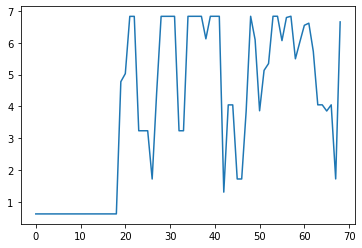

In [6]:
plt.plot(weight)

In [7]:
from lib.v2.shrimp_growth import ShrimpGrowth

In [8]:
ShrimpGrowth.weight(0, 1, 0.05, 40, 0.0025, 1)

12.169425839878523

In [9]:
ShrimpGrowth.weight(0, 5, 0.05, 40, 0, 1)

39.28287394386652

In [48]:
def weight(t0, t, w0, wn, fr, alpha, constant_fr=1):
    """
    t: time at t
    t0: initial time
    w0: initial weight
    wn: weight at time t
    alpha: shrimp growth rate
    constant_fr: the function of F which will be integrated
    """
    
    wt = (wn**(1/3) - (wn**(1/3) - w0**(1/3)) 
        * np.exp(-alpha*((fr + quad(lambda x: 1, t0, t)[0]))))**3
    return wt

In [47]:
weight(0, 0, 0.05, 40, -0.8830715314852546, 0.05)

0.012270053632977394

In [12]:
from scipy.integrate import quad

In [28]:
quad(lambda x: 1, 0, 5)[0]

5.0

In [27]:
(40**(1/3) - (40**(1/3)-(0.05**(1/3)))*np.exp(-1))

2.2973498468911124